# Tutorial 7: Pandas with real world data
TA: ZHANG Wei

E-mail: wzhang472-c@my.cityu.edu.hk

### Introduction
This tutorial will show you pandas operations using the real world dataset.


### Example 1: the US States Dataset
1.The US States Dataset ("state-abbrevs.csv", "state-areas.csv" and "state-population.csv") can be downloaded at https://github.com/jakevdp/data-USstates/, please download these csv files and put them in the same directory as this tutorial jupyter file before runing the next cell.


"state-abbrevs.csv" contains the relationship between the names of states and their abbrevations (examples are shown below).

|       | state    | abbreviation  | 
|----------|-----------|---------------|
|0      |Alabama    |AL     | 
|1      |Alaska     |AK    | 
|2      |Arizona    |AZ    | 
|3      |Arkansas   |AR    |
|4      |California  |CA  |

"state-population.csv" contains the information about the population of each state, with states' abbreviation names as indicators. Also, for each state in each year, it records the population for people under18 and in total respectively (examples are shown below).

|       | state/region| ages  | year	|population| 
|----------|-------------|-------|------|----------| 
|0      |AL       |under18   |2012 |1117489.0|
|1      |AL       |total     |2012|4817528.0|
|2      |AL       |under18   |2010|1130966.0|
|3      |AL       |total     |2010|4785570.0|
|4      |AL       |under18    |2011|1125763.0|

"state-areas.csv" contains the information about the area of each state, with states' names as indicators (examples are shown below).

|       | state    | area (sq. mi)  | 
|----------|-----------|---------------|
|0      |Alabama    |52423     | 
|1      |Alaska     |656425    | 
|2      |Arizona    |114006    | 
|3      |Arkansas   |53182   |
|4      |California  |163707  |


In [1]:
# import the pandas package first
import pandas as pd

### Question 1

1.1 read the "state-abbrevs.csv", "state-areas.csv" and "state-population.csv" respectively

1.2 print the first 5 rows of the three csv respectively using at least two different ways

1.3 query the information about the 2010 population in total for each state from the dataframe you built, and print the first 5 rows.

Hint: query()

In [2]:
# 1.1 read the csv
abbr = pd.read_csv('state-abbrevs.csv')
pop  = pd.read_csv('state-population.csv')
area = pd.read_csv('state-areas.csv')

In [3]:
# 1.2 first 5 rows of state-abbrevs.csv
abbr.head(5)

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [4]:
# 1.2 first 5 rows of state-population.csv
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [5]:
# 1.2 first 5 rows of state-areas.csv
area.iloc[:5]

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


|       | state/region| ages  | year	|population| 
|----------|-------------|-------|------|----------| 
|0      |AL       |under18   |2012 |1117489.0|
|1      |AL       |total     |2012|4817528.0|
|2      |AL       |under18   |2010|1130966.0|
|3      |AL       |total     |2010|4785570.0|
|4      |AL       |under18    |2011|1125763.0|

In [6]:
# 1.3 query the information about the 2010 population in total for each state from the dataframe you built, and print the first 5 rows.
pop.query("year==2010 & ages=='total'").head()

,state/region,ages,year,population
3,AL,total,2010,4785570.0
91,AK,total,2010,713868.0
101,AZ,total,2010,6408790.0
189,AR,total,2010,2922280.0
197,CA,total,2010,37333601.0


### Question 2

Compute the 2010 population density of each state and print the top 5 states in descending order.

Hint 1: population density = population/area

Hint 2: information of population and area are in different dataframe, you may need to merge the population and area dataframes

Hint 3: population and area dataframe have different keys, you may need to find the mapping bewteen population and area dataframe by abbreviation

Hint 4: merge()

Hint 5: sort_values()

In [7]:
# step 1: select the information of 2010 population
pop_2010 = pop.query("year==2010 & ages=='total'")
pop_2010.head()

,state/region,ages,year,population
3,AL,total,2010,4785570.0
91,AK,total,2010,713868.0
101,AZ,total,2010,6408790.0
189,AR,total,2010,2922280.0
197,CA,total,2010,37333601.0


In [8]:
# step 2: merge area and the abbreviation
area_abbr = area.merge(abbr)
area_abbr.head(5)

,state,area (sq. mi),abbreviation
0,Alabama,52423,AL
1,Alaska,656425,AK
2,Arizona,114006,AZ
3,Arkansas,53182,AR
4,California,163707,CA


In [9]:
# step 3: check the index in area and population to decide the merge key
print(area_abbr.columns)
print(pop_2010.columns)

Index(['state', 'area (sq. mi)', 'abbreviation'], dtype='object')
Index(['state/region', 'ages', 'year', 'population'], dtype='object')


In [10]:
# step 4: merge area and population by the key
pop_area_abbr_2010 = pop_2010.merge(area_abbr,left_on='state/region',right_on='abbreviation')
pop_area_abbr_2010.head()

,state/region,ages,year,population,state,area (sq. mi),abbreviation
0,AL,total,2010,4785570.0,Alabama,52423,AL
1,AK,total,2010,713868.0,Alaska,656425,AK
2,AZ,total,2010,6408790.0,Arizona,114006,AZ
3,AR,total,2010,2922280.0,Arkansas,53182,AR
4,CA,total,2010,37333601.0,California,163707,CA


In [11]:
# step 5: check the key in the merged dataframe
print(pop_area_abbr_2010.columns)

Index(['state/region', 'ages', 'year', 'population', 'state', 'area (sq. mi)',
       'abbreviation'],
      dtype='object')


In [12]:
# step 6: compute the population density by the population and area, and add a new column 'density'
pop_area_abbr_2010['density'] = pop_area_abbr_2010['population']/pop_area_abbr_2010['area (sq. mi)']
print(pop_area_abbr_2010.columns)
pop_area_abbr_2010.head()

Index(['state/region', 'ages', 'year', 'population', 'state', 'area (sq. mi)',
       'abbreviation', 'density'],
      dtype='object')


,state/region,ages,year,population,state,area (sq. mi),abbreviation,density
0,AL,total,2010,4785570.0,Alabama,52423,AL,91.287603
1,AK,total,2010,713868.0,Alaska,656425,AK,1.087509
2,AZ,total,2010,6408790.0,Arizona,114006,AZ,56.214497
3,AR,total,2010,2922280.0,Arkansas,53182,AR,54.948667
4,CA,total,2010,37333601.0,California,163707,CA,228.051342


In [13]:
# step 7: sort the density and print the top 5 states
pop_area_abbr_2010.sort_values(by='density',ascending=False)[['state','density']].head(5)

,state,density
8,District of Columbia,8898.897059
30,New Jersey,1009.253268
39,Rhode Island,681.339159
6,Connecticut,645.600649
21,Massachusetts,621.815538


### Example 2: Planets dataset

Planets dataset contains the information about the planets beyond our solar system(from 1989-2014), it is released by NASA.

Data source can be found at https://github.com/mwaskom/seaborn-data

This dataset can be directly loaded by the python package seaborn. Before running the next cells, please make sure that your computer have installed the seaborn package(you can use command "pip install seaborn" to install seaborn in your terminal).

In [14]:
# loading the planets dataset and print
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()
# method: detection method
# orbital_period: days
# mass: equal to how many Earths
# distance: light-years from earth
# year: discovery date

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### Question 3

3.1 Count discovered planets by "method"

3.2 Add a new colunm "decade", eg. turn 2001,2002,…2009 into 2000

3.3 Change the int type to string type in colunm "decade", eg. "2000"->"2000s"

3.4 Count discovered planets by "decade"

3.5 Group the dataframe by 'method' and 'year' and turn it into a 2-dim table.

3.6 Replace the NaN in question 3.5 into 0

Hint 1: groupby()

Hint 2: count()

Hint 3: turn 2001,2002,…2009 into 2000 by /10 and *10

Hint 4: lamda operation

Hint 5: unstack()

Hint 6: fillna(0)


In [15]:
# 3.1 count the number by method
planets.groupby('method').count()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,2,0,2,2
Eclipse Timing Variations,9,9,2,4,9
Imaging,38,12,0,32,38
Microlensing,23,7,0,10,23
Orbital Brightness Modulation,3,3,0,2,3
Pulsar Timing,5,5,0,1,5
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,553,553,510,530,553
Transit,397,397,1,224,397


In [ ]:
#3.1 Count discovered planets by "method"
planets.groupby('method').count()['number']

In [ ]:
# 3.1 Count discovered planets by "method"
planets.groupby('method')['number'].count()

In [16]:
# 3.2 add a new column "decade"
planets['decade']=planets['year']//10*10
planets.head()

,method,number,orbital_period,mass,distance,year,decade
0,Radial Velocity,1,269.300,7.10,77.40,2006,2000
1,Radial Velocity,1,874.774,2.21,56.95,2008,2000
2,Radial Velocity,1,763.000,2.60,19.84,2011,2010
3,Radial Velocity,1,326.030,19.40,110.62,2007,2000
4,Radial Velocity,1,516.220,10.50,119.47,2009,2000


In [17]:
# 3.3 Change the int type to string type in colunm "decade", eg. "2000"->"2000s"
planets['decade']=planets['decade'].apply(lambda x: str(x)+'s')
planets.head()

,method,number,orbital_period,mass,distance,year,decade
0,Radial Velocity,1,269.300,7.10,77.40,2006,2000s
1,Radial Velocity,1,874.774,2.21,56.95,2008,2000s
2,Radial Velocity,1,763.000,2.60,19.84,2011,2010s
3,Radial Velocity,1,326.030,19.40,110.62,2007,2000s
4,Radial Velocity,1,516.220,10.50,119.47,2009,2000s


In [18]:
# 3.4 Count discovered planets by "decade"
planets.groupby('decade').count()['number']

decade
1980s      1
1990s     31
2000s    406
2010s    597
Name: number, dtype: int64

In [19]:
# 3.4 Count discovered planets by "decade"
planets.groupby('decade')['number'].count()

decade
1980s      1
1990s     31
2000s    406
2010s    597
Name: number, dtype: int64

In [20]:
# 3.5 Group the dataframe by 'method' and 'decade' and turn it into a 2-dim table.
planets.groupby(['method','decade']).count()['number'].unstack()

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,3.0,6.0
Imaging,NaN,NaN,20.0,18.0
Microlensing,NaN,NaN,10.0,13.0
Orbital Brightness Modulation,NaN,NaN,NaN,3.0
Pulsar Timing,NaN,3.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,28.0,309.0,215.0
Transit,NaN,NaN,62.0,335.0


In [21]:
# 3.6 Replace the NaN in question 3.5 into 0
planets.groupby(['method','decade']).count()['number'].unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,3.0,6.0
Imaging,0.0,0.0,20.0,18.0
Microlensing,0.0,0.0,10.0,13.0
Orbital Brightness Modulation,0.0,0.0,0.0,3.0
Pulsar Timing,0.0,3.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,28.0,309.0,215.0
Transit,0.0,0.0,62.0,335.0


### Example 3: Birthrate dataset

Birthrate dataset is drawn from the USA Centers for Disease Control and Prevention. It contains the number of births of male and female from 1969 to 2008.

Data source: https://github.com/jakevdp/data-CDCbirths/

### Question 4

4.1 Add a new colunm "decade", eg. turn 2001,2002,…2009 into 2000, and then change the int type to string type in colunm "decade", eg. "2000"->"2000s".

4.2 Count number of births by "gender" and "decade".

4.3 Group the dataframe by "gender" and "decade" and turn it into a 2-dim table.

4.4 Plot the 2-dim table in question 4.3

Hint 1: ".T.plot()".

4.5 Compute the day of week according to the year-month-day data, and add a new colunm "dayofweek".

Hint 2: ".dt.dayofweek" or "lambda x: x.dayofweek" 

4.6 Group the dataframe by "dayofweek" and "decade" and turn it into a 2-dim table.

4.7 Plot the 2-dim table in question 4.6

Hint 3:  ".plot()".

In [22]:
# read the births dataset from the Internet and print
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [23]:
# 4.1 Add a new colunm "decade", eg. turn 2001,2002,…2009 into 2000
# 4.1 and then change the int type to string type in colunm "decade", eg. "2000"->"2000s".
births['decade']=births['year']//10*10
births['decade']=births['decade'].apply(lambda x: str(x)+'s')
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960s
1,1969,1,1.0,M,4440,1960s
2,1969,1,2.0,F,4454,1960s
3,1969,1,2.0,M,4548,1960s
4,1969,1,3.0,F,4548,1960s


In [24]:
# 4.2 Count number of births by "gender" and "decade".
births[['births','gender','decade']].groupby(['gender','decade']).sum()

births
gender decade          
F      1960s    1753634
       1970s   16263075
       1980s   18310351
       1990s   19479454
       2000s   18229309
M      1960s    1846572
       1970s   17121550
       1980s   19243452
       1990s   20420553
       2000s   19106428

In [25]:
# 4.3 Group the dataframe by "gender" and "decade" and turn it into a 2-dim table.
births[['births','gender','decade']].groupby(['gender','decade']).sum().unstack()

births                                        
decade    1960s     1970s     1980s     1990s     2000s
gender                                                 
F       1753634  16263075  18310351  19479454  18229309
M       1846572  17121550  19243452  20420553  19106428

<AxesSubplot:xlabel='None,decade'>

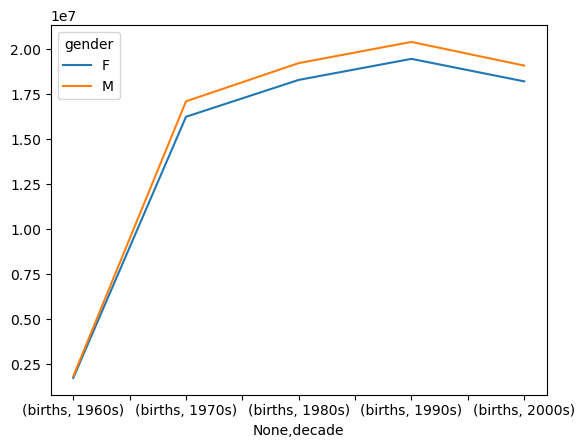

In [26]:
# 4.4 Plot the 2-dim table in question 4.3
births[['births','gender','decade']].groupby(['gender','decade']).sum().unstack().T.plot()

In [27]:
# 4.5  Compute the day of week according to the year-month-day data, and add a new colunm "dayofweek".
import numpy as np
# remove outliers via robust sigma-clipping，e.g. mis-reported data like June 31st, etc.
# reference: https://github.com/jakevdp/data-CDCbirths
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

print(pd.to_datetime(births[['year','month','day']]).apply(lambda x: x.dayofweek))
print(pd.to_datetime(births[['year','month','day']]).dt.dayofweek)

0        2
1        2
2        3
3        3
4        4
        ..
15062    3
15063    4
15064    4
15065    5
15066    5
Length: 14610, dtype: int64
0        2
1        2
2        3
3        3
4        4
        ..
15062    3
15063    4
15064    4
15065    5
15066    5
Length: 14610, dtype: int64


In [28]:
births["year"]

0        1969
1        1969
2        1969
3        1969
4        1969
         ... 
15062    1988
15063    1988
15064    1988
15065    1988
15066    1988
Name: year, Length: 14610, dtype: int64

In [29]:
# 4.5 Compute the day of week according to the year-month-day data, and add a new colunm "dayofweek".
births['dayofweek']= pd.to_datetime(births[['year','month','day']]).dt.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
0,1969,1,1.0,F,4046,1960s,2
1,1969,1,1.0,M,4440,1960s,2
2,1969,1,2.0,F,4454,1960s,3
3,1969,1,2.0,M,4548,1960s,3
4,1969,1,3.0,F,4548,1960s,4


In [30]:
# 4.6 Group the dataframe by "dayofweek" and "decade" and turn it into a 2-dim table.
births[['births','dayofweek','decade']].groupby(['dayofweek','decade']).sum().unstack()

births                  
decade      1960s    1970s    1980s
dayofweek                          
0          526638  4895418  4949739
1          549754  5090433  5173612
2          537910  4949892  5045584
3          517742  4903588  5013476
4          531220  4992508  5069502
5          483710  4392927  4214867
6          451604  4154367  4041017

<AxesSubplot:xlabel='dayofweek'>

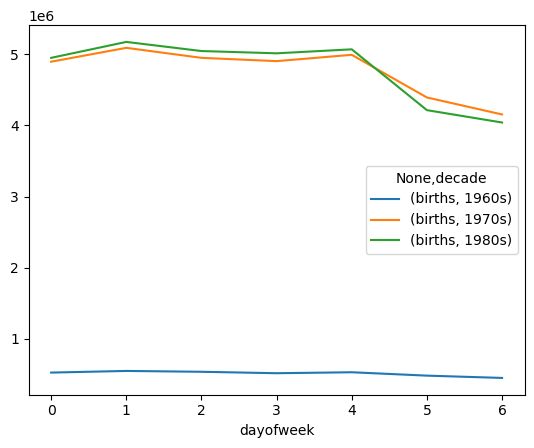

In [31]:
# 4.7 Plot the 2-dim table in question 4.3
births[['births','dayofweek','decade']].groupby(['dayofweek','decade']).sum().unstack().plot()

# Additional exercises

### Example 4: UFO dataset

This dataset contains over 80,000 records of UFO sightings dating back as far as 1949.

Content

- Date_time - standardized date and time of sighting

- city - location of UFO sighting

- state/province - the US state or Canadian province, appears blank for other locations

- country - Country of UFO sighting

- UFO_shape - a one word description of the "spacecraft"

- lengthofencounter_seconds - standardized to seconds, length of the observation of the UFO

- described_duration _of_encounter - raw description of the length of the encounter (shows uncertainty to previous column)

- description - text description of the UFO encounter. Warning column is messy, with some curation it could lend itself to some natural language processing and sentiment analysis.

- date_documented - when was the UFO sighting reported

- latitude - latitude

- longitude - longitude

Data source can be found at https://www.kaggle.com/camnugent/ufo-sightings-around-the-world. You need to download the "ufo_sighting_data.csv" in the directory of this jupyter file before running the next cell.

### Question 5 

5.1 Print the data types of each column.

5.2 Convert "date_documented" and "Date_time" columns into datetime type.

5.3 Fix the "ParserError: hour must be in 0..23: 10/11/2006 24:00" error in 6.2 when convert "Date_time" column into datetime type.

Hint 1: Find the index of the rows where 'Date_time' have '24:00' and drop them then convert the column into datetime type.

5.4 get the difference (in days) between 'Date_time' and 'date_documented'e of UFO and add a new colunm "Difference"

5.5 Use the 'Date_time' column as dates to add a new column named 'year'.

5.6 Create a plot to present the number of UFO reports per year (use'Date_time' and 'year').


Hint 1: dtypes

Hint 2: astype('datetime64[ns]')

Hint 3: dt.days

Hint 4: dt.year

Hint 5: plot()

In [32]:
# read and print the ufo dataset
import pandas as pd
ufo=pd.read_csv('ufo_sighting_data.csv')
ufo.head(2)

C:\Users\wzhang472-c\AppData\Local\Temp\ipykernel_13864\4216266766.py:3: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo=pd.read_csv('ufo_sighting_data.csv')


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082


In [33]:
# 5.1 Print the data types of each column
ufo.dtypes

Date_time                           object
city                                object
state/province                      object
country                             object
UFO_shape                           object
length_of_encounter_seconds         object
described_duration_of_encounter     object
description                         object
date_documented                     object
latitude                            object
longitude                          float64
dtype: object

In [34]:
# 5.2 Convert "date_documented" column into datetime type.
print(ufo['date_documented'].head())
ufo['date_documented'] = ufo['date_documented'].astype('datetime64[ns]')
ufo['date_documented'].head()

0     4/27/2004
1    12/16/2005
2     1/21/2008
3     1/17/2004
4     1/22/2004
Name: date_documented, dtype: object


0   2004-04-27
1   2005-12-16
2   2008-01-21
3   2004-01-17
4   2004-01-22
Name: date_documented, dtype: datetime64[ns]

In [35]:
# 5.2 Convert "Date_time" column into datetime type.
ufo['Date_time'] = ufo['Date_time'].astype('datetime64[ns]')

ParserError: hour must be in 0..23: 10/11/2006 24:00

In [36]:
# 5.3 find the data with wrong format
ufo[ufo['Date_time'].apply(lambda x: x.find('24:00')!=-1)].index

Int64Index([  388,   693,   962,  1067,  1221,  1222,  1317,  1359,  1445,
             1663,
            ...
            78480, 78665, 79091, 79124, 79125, 79136, 79137, 79740, 79759,
            79942],
           dtype='int64', length=694)

In [37]:
# 5.3 fix the "ParserError: hour must be in 0..23: 10/11/2006 24:00" error in 6.2 when convert "Date_time" column into datetime type.
print(ufo['Date_time'].head())
ufo.drop(ufo[ufo['Date_time'].apply(lambda x: x.find('24:00')!=-1)].index,axis=0,inplace=True)
ufo['Date_time'] = ufo['Date_time'].astype('datetime64[ns]')
ufo['Date_time'].head()

0    10/10/1949 20:30
1    10/10/1949 21:00
2    10/10/1955 17:00
3    10/10/1956 21:00
4    10/10/1960 20:00
Name: Date_time, dtype: object


0   1949-10-10 20:30:00
1   1949-10-10 21:00:00
2   1955-10-10 17:00:00
3   1956-10-10 21:00:00
4   1960-10-10 20:00:00
Name: Date_time, dtype: datetime64[ns]

In [38]:
#5.4 get the difference (in days) between 'Date_time' and 'date_documented'e of UFO and add a new colunm "Difference"
ufo['Difference'] = (ufo['date_documented'] - ufo['Date_time']).dt.days
ufo['Difference'].head()

0    19922
1    20520
2    19095
3    17264
4    15808
Name: Difference, dtype: int64

In [39]:
# 5.5 Use the 'Date_time' column as dates to add a new column named 'year'.
ufo['year']=ufo['Date_time'].dt.year
ufo['year'].head()

0    1949
1    1949
2    1955
3    1956
4    1960
Name: year, dtype: int64

<AxesSubplot:xlabel='year'>

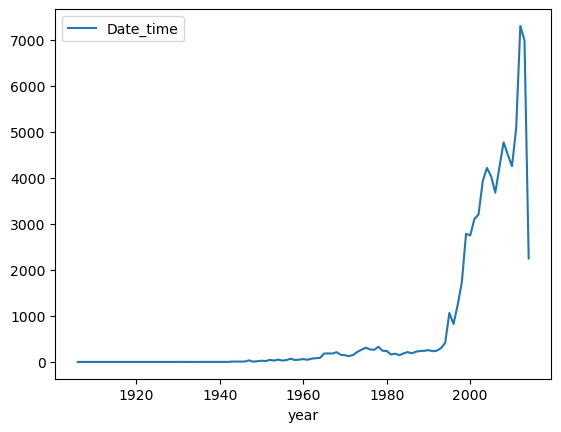

In [40]:
# 5.6 Create a plot to present the number of UFO reports per year (use'Date_time' and 'year').
ufo[['year','Date_time']].groupby('year').count().sort_index().plot()